## Attempt with Plotly - World Map using Total Years in War

In [3]:
import plotly
import numpy as np
import pandas as pd

In [2]:
plotly.offline.init_notebook_mode(connected=True)

In [235]:
# Set folder name
file_path = '../pandas_dfs/'

# Set filenames
years_in_war_file = 'years_per_country.csv'

# Read the files
total_years = pd.read_csv(file_path + years_in_war_file, encoding='latin-1')

In [236]:
total_years.head()

,country,years
0,Mali,1
1,South Ossetia,1
2,South Korea,1
3,Slovenia,1
4,Burkina Faso,1


In [237]:
data = [dict(type='choropleth',
             locations = total_years['country'].astype(str),
             z=total_years['years'].astype(float),
             colorscale = 'Reds',
             locationmode='country names')]

In [238]:
layout = dict(geo=dict(scope='world',
              projection={'type': 'equirectangular'},
                      showframe=False))

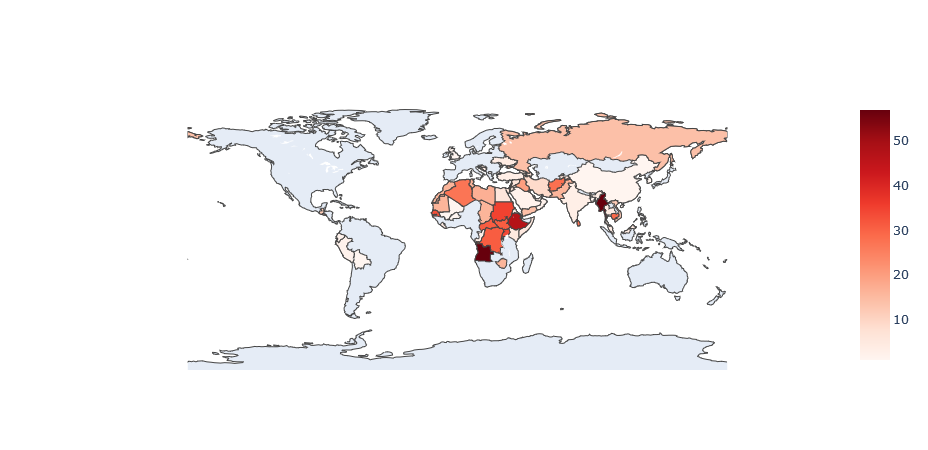

In [239]:
fig = dict(data=data, layout=layout)
# Need to add title
plotly.offline.iplot(fig)

## Attempt with crop production over years

In [79]:
# Set folder name
file_path = '../pandas_dfs/'

# Set filenames
merged_data_file = 'merged_data.csv'
country_codes_file = 'plotly_countries_and_codes.csv'

# Read the files
merged_data = pd.read_csv(file_path + merged_data_file, encoding='latin-1')
country_codes = pd.read_csv(file_path + country_codes_file, encoding='latin-1')

In [66]:
merged_data.head()

,country,year,value_crop,value_livestock,value_population,value_land_area
0,Afghanistan,1961-01-01,5909080.0,25104700.0,9169.410,37700.0
1,Afghanistan,1962-01-01,5934534.0,25442170.0,9351.441,37760.0
2,Afghanistan,1963-01-01,5686583.0,25605000.0,9543.205,37810.0
3,Afghanistan,1964-01-01,6147934.0,25855300.0,9744.781,37873.0
4,Afghanistan,1965-01-01,6274668.0,26205500.0,9956.320,37875.0


In [83]:
country_codes = country_codes.rename(columns={
        'COUNTRY': 'country'})
country_codes.head()

,country,GDP (BILLIONS),CODE
0,Afghanistan,21.71,AFG
1,Albania,13.40,ALB
2,Algeria,227.80,DZA
3,American Samoa,0.75,ASM
4,Andorra,4.80,AND


In [100]:
#Add country codes to merged_data

merged_data_df = pd.merge(merged_data,country_codes[['country','CODE']],on='country', how='left')
merged_data_df.head()

,country,year,value_crop,value_livestock,value_population,value_land_area,CODE
0,Afghanistan,1961-01-01,5909080.0,25104700.0,9169.410,37700.0,AFG
1,Afghanistan,1962-01-01,5934534.0,25442170.0,9351.441,37760.0,AFG
2,Afghanistan,1963-01-01,5686583.0,25605000.0,9543.205,37810.0,AFG
3,Afghanistan,1964-01-01,6147934.0,25855300.0,9744.781,37873.0,AFG
4,Afghanistan,1965-01-01,6274668.0,26205500.0,9956.320,37875.0,AFG


In [104]:
# Make new column with year only

merged_data_df['year_only'] = pd.DatetimeIndex(merged_data_df['year']).year
merged_data_df.head()

,country,year,value_crop,value_livestock,value_population,value_land_area,CODE,year_only
0,Afghanistan,1961-01-01,5909080.0,25104700.0,9169.410,37700.0,AFG,1961
1,Afghanistan,1962-01-01,5934534.0,25442170.0,9351.441,37760.0,AFG,1962
2,Afghanistan,1963-01-01,5686583.0,25605000.0,9543.205,37810.0,AFG,1963
3,Afghanistan,1964-01-01,6147934.0,25855300.0,9744.781,37873.0,AFG,1964
4,Afghanistan,1965-01-01,6274668.0,26205500.0,9956.320,37875.0,AFG,1965


In [97]:
merged_data_df.dtypes

country              object
year                 object
value_crop          float64
value_livestock     float64
value_population    float64
value_land_area     float64
CODE                 object
dtype: object

In [129]:
z=merged_data.loc[merged_data['year_only'] == 1961]['value_crop'].reset_index(drop=True)
z

Series([], Name: value_crop, dtype: float64)

In [223]:
data2 = [dict(type='choropleth',
             locations = merged_data_df.loc[merged_data_df['year_only'] == 1961]['country'].reset_index(drop=True).astype(str),
             z=merged_data_df.loc[merged_data_df['year_only'] == 1961]['value_crop'].reset_index(drop=True).astype(float),
             colorscale = 'Blues',
             locationmode='country names')]

In [224]:
year = 1961
# Used a small range because it gets slow with a lot of them
for i in range(5):
    dict_temp = [dict(type='choropleth',
             locations = merged_data_df.loc[merged_data_df['year_only'] == (year +i)]['country'].reset_index(drop=True).astype(str),
             z=merged_data_df.loc[merged_data_df['year_only'] == (year + i)]['value_crop'].reset_index(drop=True).astype(float),
             colorscale = 'Blues',
             locationmode='country names')]
    data2.append(dict_temp[0].copy())
   # data[-1]['z'] = data[0]['z'] 

In [225]:
# let's create the steps for the slider
steps = []
for i in range(5):
    step = dict(method='restyle',
                args=['visible', [False] * len(data)],
                label='Year {}'.format(i + 1961))
    step['args'][1][i] = True
    steps.append(step)

In [230]:
sliders = [dict(active=0,
                pad={"t": 1},
                steps=steps)]    
layout2 = dict(geo=dict(scope='world',
              projection={'type': 'equirectangular'},
              showframe=False),
              sliders=sliders)


#list of projection types https://stackoverflow.com/questions/32041078/plotly-map-projection-types

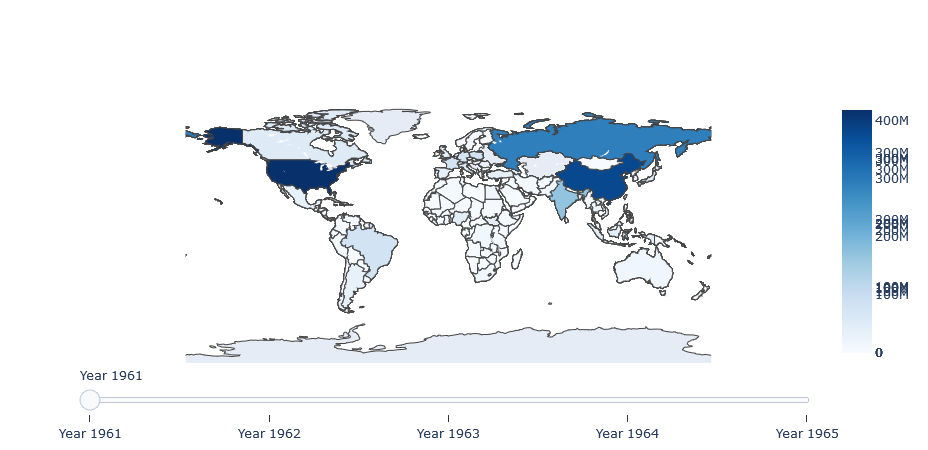

In [232]:
fig2 = dict(data=data2, layout=layout2)
# Need to add title
plotly.offline.iplot(fig2)

In [ ]:
#Really cool 3D map!! Also absolutely useless in this case :P

sliders = [dict(active=0,
                pad={"t": 1},
                steps=steps)]    
layout3 = dict(geo=dict(scope='world',
              showocean = True,
              projection={'type': "orthographic"},
              oceancolor = 'rgb(255, 192, 203)'),
              sliders=sliders)

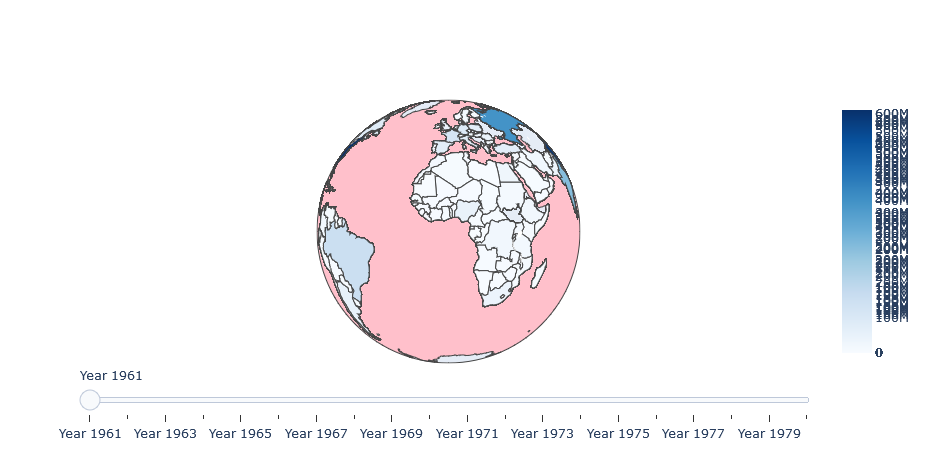

In [179]:
fig3 = dict(data=data2, 
           layout=layout3)

plotly.offline.iplot(fig3)

## Attempt at connecting all participants to wars

Note, the data is messy, I just wanted to see the result for now

In [255]:
# Retrieve geolocations of country centroids

# Set folder name
file_path = '../pandas_dfs/'

# Set filenames
centroids_file = 'country_centroids.csv'
final_wars_file = 'final_wars_df.csv'

# Read the files
raw_country_centroids_df = pd.read_csv(file_path + centroids_file, encoding='latin-1')
final_wars_df = pd.read_csv(file_path + final_wars_file, encoding='latin-1')

In [248]:
raw_country_centroids_df.head()

,FID,the_geom,FID_,scalerank,featurecla,labelrank,sovereignt,sov_a3,adm0_dif,level,...,region_un,subregion,region_wb,name_len,long_len,abbrev_len,tiny,homepart,Longitude,Latitude
0,country_centroids_az8.1,POINT (-69.9826771125 12.5208803838),0,3,Admin-0 country,5,Netherlands,NL1,1,2,...,Americas,Caribbean,Latin America & Caribbean,5,5,5,4,-99,-69.982677,12.520880
1,country_centroids_az8.2,POINT (66.0047336558 33.8352307278),1,1,Admin-0 country,3,Afghanistan,AFG,0,2,...,Asia,Southern Asia,South Asia,11,11,4,-99,1,66.004734,33.835231
2,country_centroids_az8.3,POINT (17.5373676815 -12.2933605438),2,1,Admin-0 country,3,Angola,AGO,0,2,...,Africa,Middle Africa,Sub-Saharan Africa,6,6,4,-99,1,17.537368,-12.293361
3,country_centroids_az8.4,POINT (-63.0649892654 18.2239595023),3,1,Admin-0 country,6,United Kingdom,GB1,1,2,...,Americas,Caribbean,Latin America & Caribbean,8,8,4,-99,-99,-63.064989,18.223959
4,country_centroids_az8.5,POINT (20.0498339611 41.1424498947),4,1,Admin-0 country,6,Albania,ALB,0,2,...,Europe,Southern Europe,Europe & Central Asia,7,7,4,-99,1,20.049834,41.142450


In [377]:
country_centroids_df = raw_country_centroids_df[['sovereignt', 'sov_a3', 'Longitude', 'Latitude']]

country_centroids_df = country_centroids_df.rename(columns={
        'sovereignt': 'country',
        'sov_a3': 'code',
        'Longitude': 'longitude',
        'Latitude': 'latitude'
    })

country_centroids_df.head()

,country,code,longitude,latitude
0,Netherlands,NL1,-69.982677,12.520880
1,Afghanistan,AFG,66.004734,33.835231
2,Angola,AGO,17.537368,-12.293361
3,United Kingdom,GB1,-63.064989,18.223959
4,Albania,ALB,20.049834,41.142450


In [378]:
final_wars_df.head()

,name,country,end_year,is_state,location,participant,start_year
0,Indo-Pakistani War of 1965.,People's Republic of China,1965-01-01,True,Kashmir,India,1965-01-01
1,Indo-Pakistani War of 1965.,People's Republic of China,1965-01-01,True,Kashmir,Pakistan,1965-01-01
2,Indo-Pakistani War of 1965.,Pakistan,1965-01-01,True,Kashmir,India,1965-01-01
3,Indo-Pakistani War of 1965.,Pakistan,1965-01-01,True,Kashmir,Pakistan,1965-01-01
4,Indo-Pakistani War of 1965.,India,1965-01-01,True,Kashmir,India,1965-01-01


In [379]:
import plotly.graph_objects as go
import pandas as pd

In [380]:
country_centroids_df.loc[country_centroids_df['country'] == 'United States of America']

,country,code,longitude,latitude
10,United States of America,US1,-170.718026,-14.304460
88,United States of America,US1,144.767910,13.441656
147,United States of America,US1,145.619697,15.829276
175,United States of America,US1,-66.473076,18.228131
226,United States of America,US1,-112.461674,45.679547
232,United States of America,US1,-64.803015,17.955006


Countries that have different areas of land have multiple inputs in the centroids DF. This sucks but can be fixed if ever we decide to use this map

In [381]:
country_centroids_df.drop_duplicates(subset="country", inplace = True)

In [382]:
country_centroids_df.loc[country_centroids_df['country'] == 'United States of America']

,country,code,longitude,latitude
10,United States of America,US1,-170.718026,-14.30446


In [368]:
# USA coordinate seems off, will update manually
# France as well (they use coordinates of small islands as the first entry)
# A few others as well, we can fix this if we decide to use this kind of map

country_centroids_df.loc[country_centroids_df['country'] == 'United States of America', 'longitude'] = -100.0
country_centroids_df.loc[country_centroids_df['country'] == 'United States of America', 'latitude'] = 40.0

country_centroids_df.loc[country_centroids_df['country'] == 'France', 'longitude'] = 3.0
country_centroids_df.loc[country_centroids_df['country'] == 'France', 'latitude'] = 47.0

country_centroids_df.loc[country_centroids_df['country'] == 'Netherlands', 'longitude'] = 5.8
country_centroids_df.loc[country_centroids_df['country'] == 'Netherlands', 'latitude'] = 52.5

In [369]:
country_centroids_df.loc[country_centroids_df['country'] == 'United States of America']

,country,code,longitude,latitude
10,United States of America,US1,-100.0,40.0


In [370]:
fig = go.Figure()

In [371]:
# Skipping errors for now just to see a result. Country names are not all the same in the two DFs at this point

for i in range(len(final_wars_df)):
    try:
        fig.add_trace(
            go.Scattergeo(
                locationmode = 'country names',
                lon = ([country_centroids_df.loc[country_centroids_df['country'] == final_wars_df['participant'][i]]['longitude'].values[0], 
                   country_centroids_df.loc[country_centroids_df['country'] == final_wars_df['country'][i]]['longitude'].values[0]]),
                lat = ([country_centroids_df.loc[country_centroids_df['country'] == final_wars_df['participant'][i]]['latitude'].values[0], 
                   country_centroids_df.loc[country_centroids_df['country'] == final_wars_df['country'][i]]['latitude'].values[0]]),
                mode = 'lines',
                line = dict(width = 0.5,color = 'red'),
        )
    )
    except:
        pass

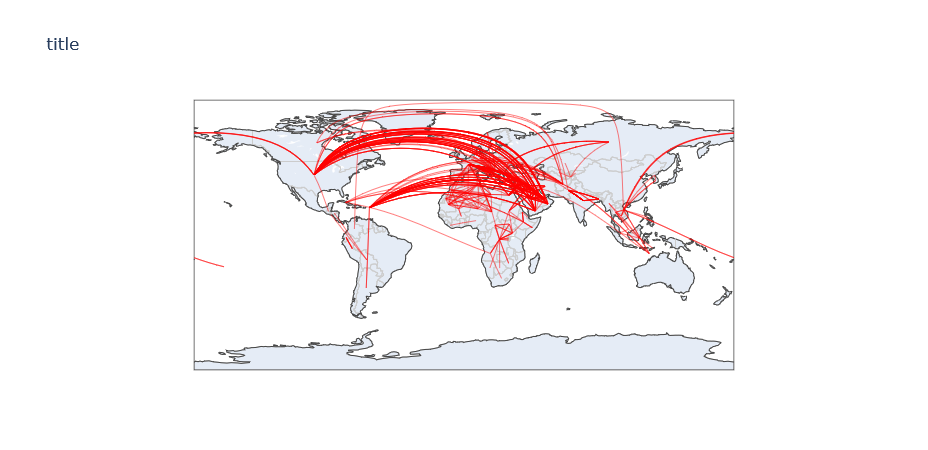

In [384]:
fig.update_layout(
    title_text = 'title',
    showlegend = False,
    geo = go.layout.Geo(
        scope = 'world',
        projection_type = 'equirectangular',
        showland = True,
        showcountries = True,
        #landcolor = 'rgb(243, 243, 243)',
        countrycolor = 'rgb(204, 204, 204)',
    ),
)

fig.show()